<a href="https://colab.research.google.com/github/callowidealist/Stock-Prediction/blob/main/Stock_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TATAMOTORS.csv to TATAMOTORS.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv(io.BytesIO(uploaded['TATAMOTORS.csv']), encoding = 'unicode_escape')
print(df.head())
print(df.shape)

         Date Symbol Series  ...  Trades  Deliverable Volume  %Deliverble
0  2000-01-03  TELCO     EQ  ...     NaN                 NaN          NaN
1  2000-01-04  TELCO     EQ  ...     NaN                 NaN          NaN
2  2000-01-05  TELCO     EQ  ...     NaN                 NaN          NaN
3  2000-01-06  TELCO     EQ  ...     NaN                 NaN          NaN
4  2000-01-07  TELCO     EQ  ...     NaN                 NaN          NaN

[5 rows x 15 columns]
(5306, 15)


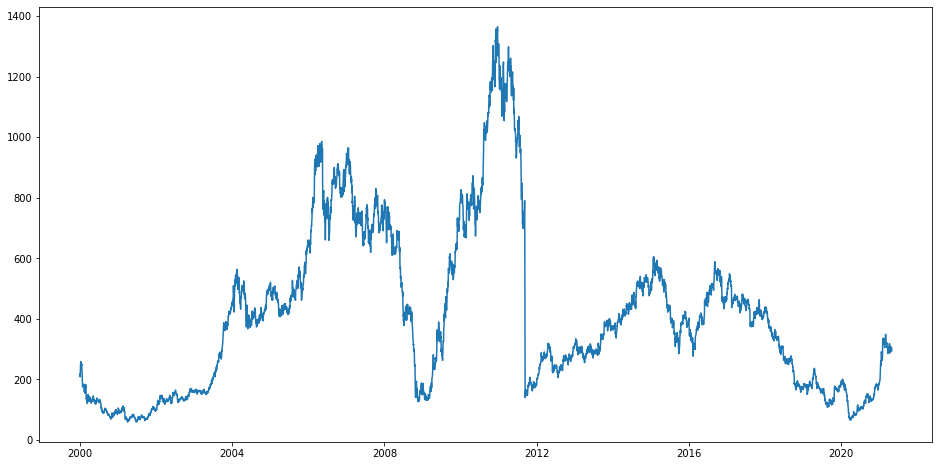

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
print(df['Date'].min(), df['Date'].max())
df1 = df[['Date', 'Close']]

2000-01-03 00:00:00 2021-04-30 00:00:00


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


<Figure size 1296x432 with 0 Axes>

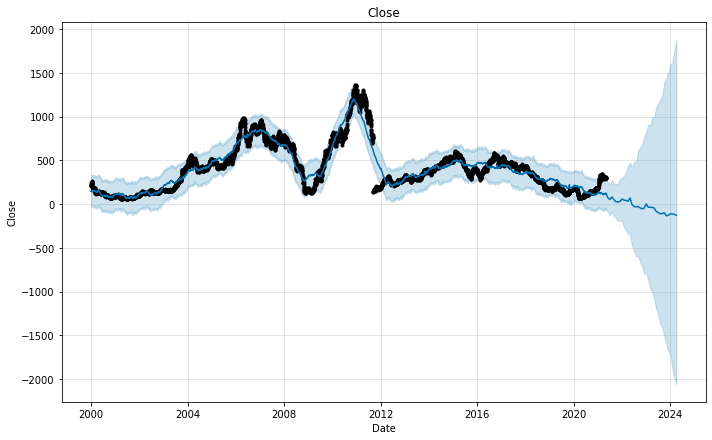

In [ ]:
from fbprophet import Prophet
df1 = df1.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(df1)
forecast = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(forecast)
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Close')
plt.title('Close');

In [ ]:
forecast1 = forecast
Close_names = ['Close_%s' % column for column in forecast.columns]
forecast1.columns = Close_names
forecast1 = forecast1.rename(columns={'Close_ds': 'Date'})
forecast1.head()

,Date,Close_trend,Close_yhat_lower,Close_yhat_upper,Close_trend_lower,Close_trend_upper,Close_additive_terms,Close_additive_terms_lower,Close_additive_terms_upper,Close_daily,Close_daily_lower,Close_daily_upper,Close_weekly,Close_weekly_lower,Close_weekly_upper,Close_yearly,Close_yearly_lower,Close_yearly_upper,Close_multiplicative_terms,Close_multiplicative_terms_lower,Close_multiplicative_terms_upper,Close_yhat
0,2000-01-03,196.569449,-14.475539,311.516198,196.569449,196.569449,-50.029292,-50.029292,-50.029292,-59.848924,-59.848924,-59.848924,-7.574640,-7.574640,-7.574640,17.394271,17.394271,17.394271,0.0,0.0,0.0,146.540157
1,2000-01-04,196.477323,-14.176364,319.778447,196.477323,196.477323,-48.047836,-48.047836,-48.047836,-59.848924,-59.848924,-59.848924,-6.595669,-6.595669,-6.595669,18.396757,18.396757,18.396757,0.0,0.0,0.0,148.429487
2,2000-01-05,196.385198,-14.713951,318.178460,196.385198,196.385198,-47.094841,-47.094841,-47.094841,-59.848924,-59.848924,-59.848924,-6.589976,-6.589976,-6.589976,19.344059,19.344059,19.344059,0.0,0.0,0.0,149.290357
3,2000-01-06,196.293072,-19.754615,333.773467,196.293072,196.293072,-44.145709,-44.145709,-44.145709,-59.848924,-59.848924,-59.848924,-4.523198,-4.523198,-4.523198,20.226413,20.226413,20.226413,0.0,0.0,0.0,152.147364
4,2000-01-07,196.200947,-20.314371,314.711634,196.200947,196.200947,-45.171945,-45.171945,-45.171945,-59.848924,-59.848924,-59.848924,-6.357927,-6.357927,-6.357927,21.034906,21.034906,21.034906,0.0,0.0,0.0,151.029002


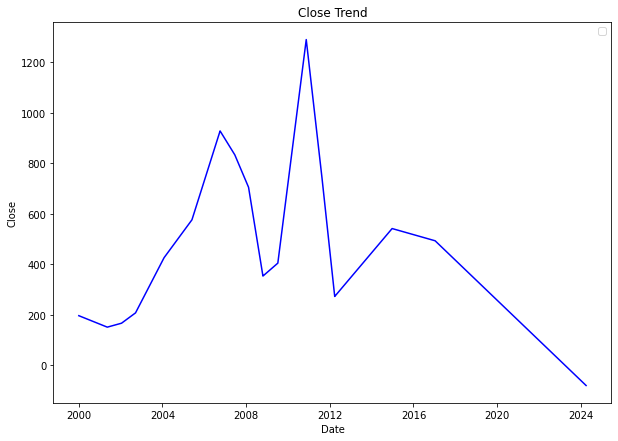

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast1['Date'], forecast1['Close_trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close Trend');

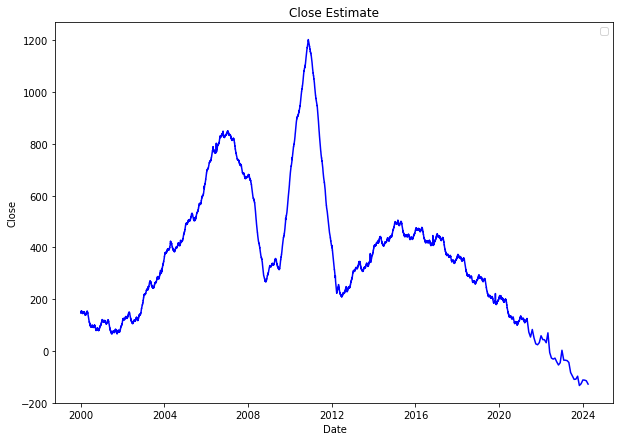

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast1['Date'], forecast1['Close_yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close Estimate');

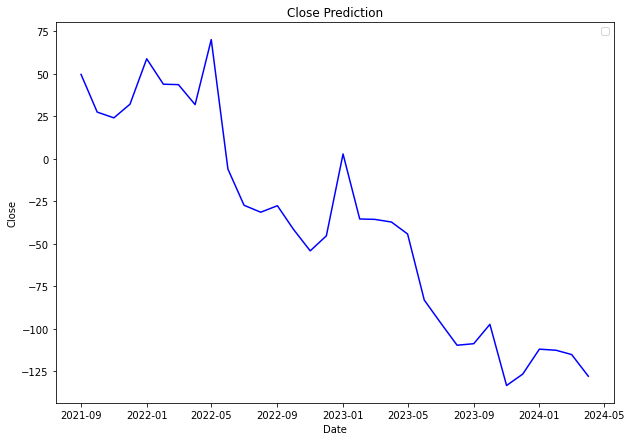

In [ ]:
import datetime
from datetime import datetime
from datetime import timedelta

past = datetime.now() 

forecast2 = forecast1[forecast1.Date > past]
plt.figure(figsize=(10, 7))
plt.plot(forecast2['Date'], forecast2['Close_yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close Prediction');